# Predicting Polish demography (total population, year by year), using fertility rate, imigration data and historic population change.
First off, required imports:


In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
import re
import json


# Data to process
First of all, population over the years.
We will take this from World Development Indicators, as they have very recent data, just from 2024-03-28.



In [2]:


df = pd.read_csv('Countries_population.csv')

polish_population_df = df[df['Country Name'] == 'Poland']
polish_population_df = polish_population_df.drop(columns=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'])
polish_population_df.dropna(axis='columns',inplace=True)
polish_population_df.index=['Population']
polish_population_df=polish_population_df.T
polish_population_df


,Population
1960,29637450.0
1961,29964000.0
1962,30308500.0
1963,30712000.0
1964,31139450.0
...,...
2018,37974750.0
2019,37965475.0
2020,37899070.0
2021,37747124.0


Lets graph those values:

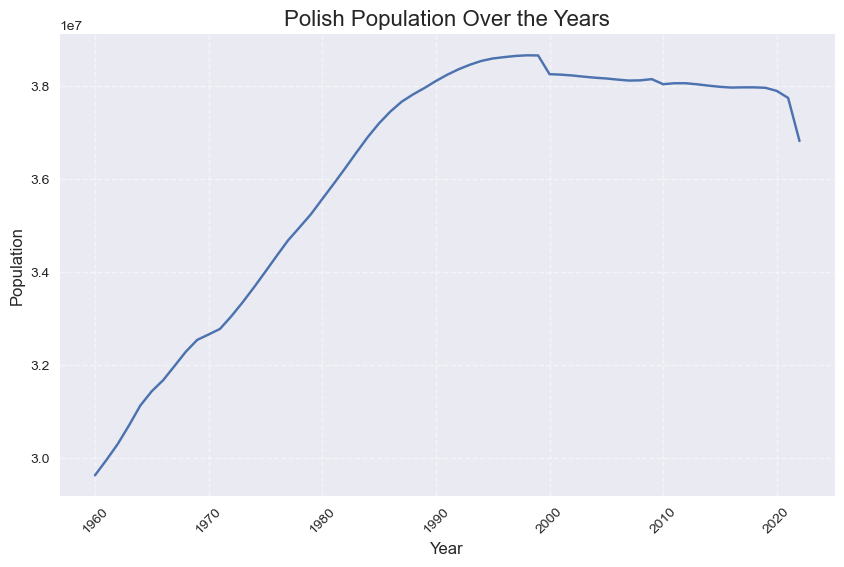

In [3]:


plt.style.use('seaborn-v0_8')

ax = polish_population_df.plot(figsize=(10, 6), legend=False)

ax.set_title('Polish Population Over the Years', fontsize=16)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Population', fontsize=12)

ax.tick_params(axis='x', labelrotation=45)
ax.tick_params(axis='both', labelsize=10)

ax.grid(True, linestyle='--', alpha=0.5)

plt.savefig('polish_population_over_the_years.png')


# International Migrant Stock
Again now, we will use World Bank data. This time, however, a problem arises - data is only colected every 5 years or so, and thus we must interpolate. I have decided to use linear interpolation from pandas.

In [4]:
df = pd.read_csv('Countries_migrant_stock.csv')

polish_migrant_stock = df[df['Country Name'] == 'Poland']
polish_migrant_stock = polish_migrant_stock.drop(columns=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'])
polish_migrant_stock.index=['International Migrant Stock']
#Because of the missing data (it is recorder only around 5 years or so we will interpolate the data
polish_migrant_stock.interpolate(method='linear', axis=1, inplace=True)
polish_population_df.dropna(axis='index',inplace=True)
polish_migrant_stock=polish_migrant_stock.T
polish_migrant_stock.drop(polish_migrant_stock.tail(2).index,inplace=True)
polish_migrant_stock

,International Migrant Stock
1960,2424881.0
1961,2389838.4
1962,2354795.8
1963,2319753.2
1964,2284710.6
...,...
2018,619403.0
2019,619403.0
2020,619403.0
2021,619403.0


Here is how it looks on a graph:

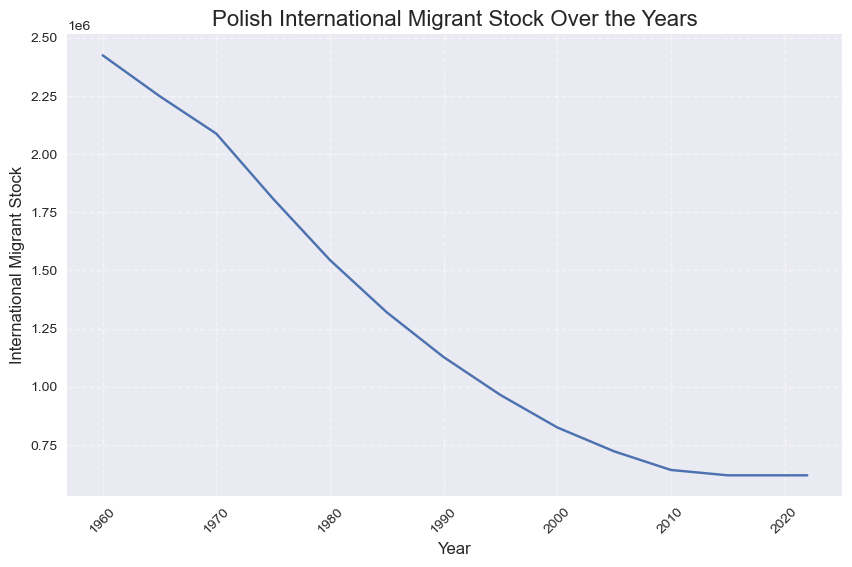

In [5]:


plt.style.use('seaborn-v0_8')

ax = polish_migrant_stock.plot(figsize=(10, 6), legend=False)

ax.set_title('Polish International Migrant Stock Over the Years', fontsize=16)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('International Migrant Stock', fontsize=12)

ax.tick_params(axis='x', labelrotation=45)
ax.tick_params(axis='both', labelsize=10)

ax.grid(True, linestyle='--', alpha=0.5)

plt.savefig('polish_int_migrant_stock_over_the_years.png')


# Fertility rate per woman
Once again, courtesy of World Bank we can find the most important statistic for population change - fertility rate.

In [6]:
df = pd.read_csv('Countries_fertility_rate.csv')

polish_fertility_rate = df[df['Country Name'] == 'Poland']
polish_fertility_rate = polish_fertility_rate.drop(columns=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'])
polish_fertility_rate.index=['Fertility Rate']
#Because of the missing data (it is recorder only around 5 years or so we will interpolate the data
polish_fertility_rate.interpolate(method='linear', axis=1, inplace=True)
polish_fertility_rate.dropna(axis='index',inplace=True)
polish_fertility_rate=polish_fertility_rate.T
polish_fertility_rate.drop(polish_fertility_rate.tail(2).index,inplace=True)
polish_fertility_rate

,Fertility Rate
1960,2.98
1961,2.83
1962,2.72
1963,2.70
1964,2.57
...,...
2018,1.46
2019,1.44
2020,1.39
2021,1.33


Now for the graph:

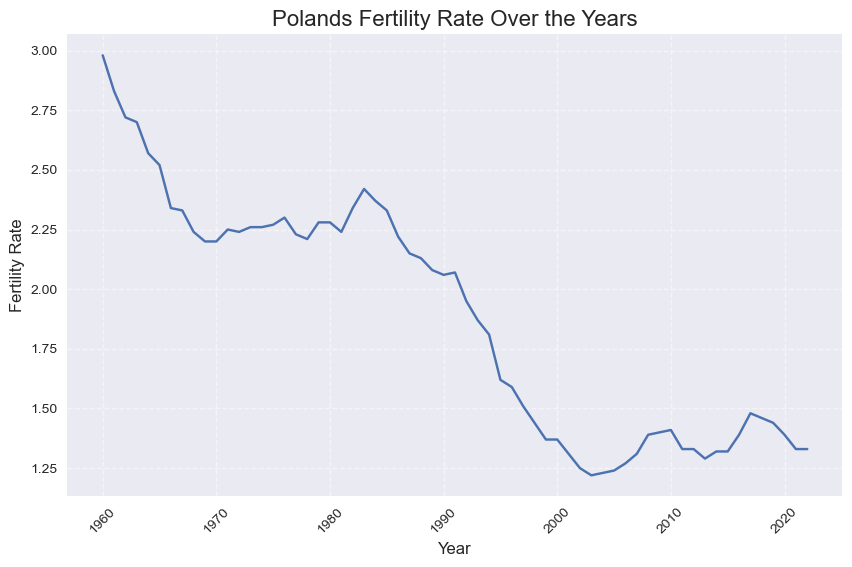

In [7]:


plt.style.use('seaborn-v0_8')

ax = polish_fertility_rate.plot(figsize=(10, 6), legend=False)

ax.set_title('Polands Fertility Rate Over the Years', fontsize=16)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Fertility Rate', fontsize=12)

ax.tick_params(axis='x', labelrotation=45)
ax.tick_params(axis='both', labelsize=10)

ax.grid(True, linestyle='--', alpha=0.5)

plt.savefig('polish_fertility_rate.png')


# Life expentancy at birth
Now for our last metric, life expentancy, at birth, once again sourced from WB:

In [8]:
df = pd.read_csv('Countries_life_expentancy_ab.csv')

polish_life_expentancy = df[df['Country Name'] == 'Poland']
polish_life_expentancy = polish_life_expentancy.drop(columns=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'])
polish_life_expentancy.index=['Life Expentancy at Birth']
#Because of the missing data (it is recorder only around 5 years or so we will interpolate the data
polish_life_expentancy.interpolate(method='linear', axis=1, inplace=True)
polish_life_expentancy.dropna(axis='index',inplace=True)
polish_life_expentancy=polish_life_expentancy.T
polish_life_expentancy.drop(polish_life_expentancy.tail(2).index,inplace=True)
polish_life_expentancy.columns

Index(['Life Expentancy at Birth'], dtype='object')

Plotting time:

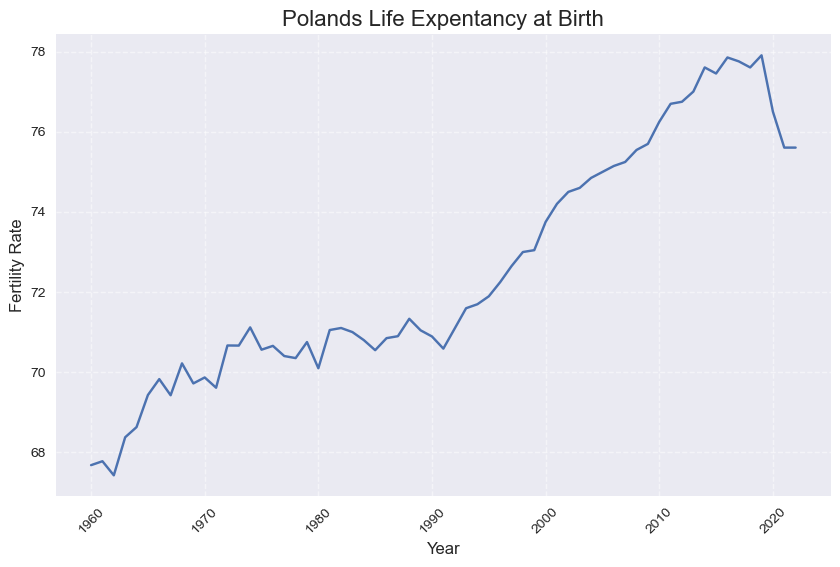

In [9]:
plt.style.use('seaborn-v0_8')

ax = polish_life_expentancy.plot(figsize=(10, 6), legend=False)

ax.set_title('Polands Life Expentancy at Birth', fontsize=16)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Fertility Rate', fontsize=12)

ax.tick_params(axis='x', labelrotation=45)
ax.tick_params(axis='both', labelsize=10)

ax.grid(True, linestyle='--', alpha=0.5)

plt.savefig('polish_life_expentancy.png')

# Urbanization level of Poland
During the research, finding the urbanization level was exceedingly hard. I found the best source at last at [Zintegrowana Platforma Edukacyjna Ministerstwa Edukacji Narodowej](https://zpe.gov.pl/a/zroznicowanie-poziomu-urbanizacji-w-polsce/D19MUchJD), but the only acceptable data was presented in a way of an image.  
I have decided to use [scrape](scrape_image.py) it, and the proceed to use [WebPlot Digitizer](https://automeris.io/WebPlotDigitizer.html) in order to turn it into analyzable form of .csv file.  
It would soon become clear that WebPlot Digitizer did a correct, but not flawless job of turning the image into a file.<br> Instead of treating years as the distinc values that they are, it created them in the form of continouus values.<br>It was nothing a quick python script could not fix however, named [python_fitter](python_fitter.py) with function modify_file that truncates real part of years and unifies them.<br>
Now, it must be noted that data only goes up all the way to 2012 - considering those were just a few years I have decided to enter them manually to the file.

In [10]:
from python_fitter import modify_file
from scrape_image import download_image
#Image sraping
download_image("https://static.zpe.gov.pl/portal/f/res-minimized/R1DRpEwOu0kly/4/fYPhB0sYKSWe5DLdlULEQRUZjaP4NGsL.png","urbanizacjawPolsce.png")
#Csv modification, image -> csv was done externally
modify_file("urbanization_analyzed")

Downloaded image successfully - urbanizacjawPolsce.png
Downloaded image successfully - urbanizacjawPolsce.png


In [11]:
df = pd.read_csv('urbanization_analyzed_modified.csv')
df.reset_index(drop=True, inplace=True)
polish_urbanization = df
polish_urbanization=polish_urbanization.drop(polish_urbanization.index[:14])
polish_urbanization.set_index('Year', inplace=True)
polish_urbanization.index.name = None
polish_urbanization.index = polish_urbanization.index.astype(str)
polish_urbanization.index = polish_urbanization.index.astype(object)
polish_urbanization


,Urbanization
1960,47.668335
1961,47.899164
1962,48.063771
1963,48.246360
1964,48.386846
...,...
2018,58.897383
2019,58.693046
2020,58.488708
2021,58.284371


# Here is the plot:

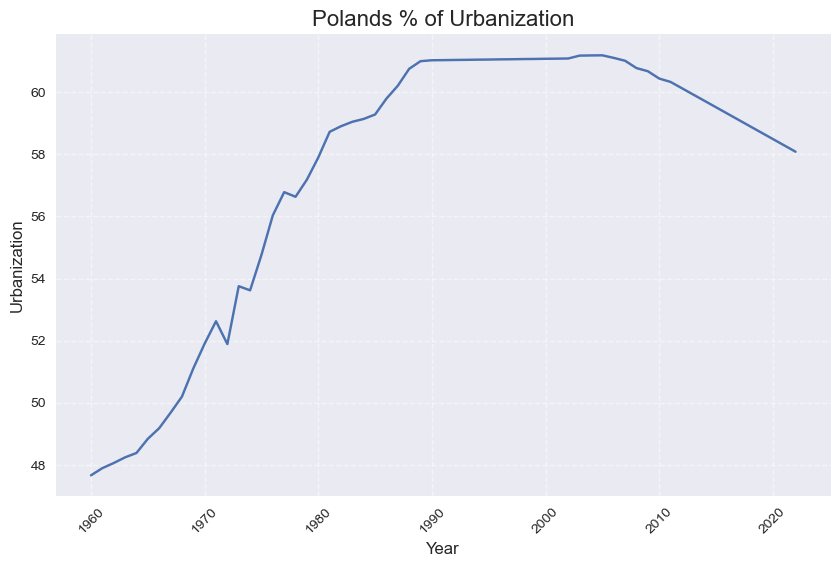

In [12]:
plt.style.use('seaborn-v0_8')

ax = polish_urbanization.plot(figsize=(10, 6), legend=False)

ax.set_title(r'Polands % of Urbanization', fontsize=16)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Urbanization', fontsize=12)

ax.tick_params(axis='x', labelrotation=45)
ax.tick_params(axis='both', labelsize=10)

ax.grid(True, linestyle='--', alpha=0.5)

plt.savefig('polish_urbanization.png')

# A useful metric might also be population growth over last 5 years.
There is no need to source this data, as we will take it from historic popylation, and for first years we will just keep it at 0.

In [29]:
pop_change = polish_population_df.pct_change(periods=5)
pop_change = pop_change.fillna(0)
pop_change = pop_change.rename(columns={'Population': 'Population Change'})
print(pop_change.to_string())

      Population Change
1960           0.000000
1961           0.000000
1962           0.000000
1963           0.000000
1964           0.000000
1965           0.060987
1966           0.057302
1967           0.055386
1968           0.051532
1969           0.045243
1970           0.038777
1971           0.034800
1972           0.033404
1973           0.032902
1974           0.034736
1975           0.041357
1976           0.047975
1977           0.049414
1978           0.048217
1979           0.046567
1980           0.045831
1981           0.044891
1982           0.044436
1983           0.045937
1984           0.047008
1985           0.045756
1986           0.043387
1987           0.039678
1988           0.034253
1989           0.028652
1990           0.024431
1991           0.021093
1992           0.018467
1993           0.016839
1994           0.015308
1995           0.012705
1996           0.009888
1997           0.007455
1998           0.005254
1999           0.003052
2000          -0

# Lets combine our data into shared Data Frame:

In [25]:
final_data=pd.concat([polish_population_df,polish_migrant_stock,polish_fertility_rate,polish_life_expentancy, polish_urbanization, pop_change],axis=1)
final_data.reset_index(level=0, inplace=True)
final_data.rename(columns={'index': 'Year'}, inplace=True)
final_data.set_index('Year', inplace=True)
final_data.style.hide(axis="index")
final_data

,Population,International Migrant Stock,Fertility Rate,Life Expentancy at Birth,Urbanization,Population Change
Year,,,,,,
1960,29637450.0,2424881.0,2.98,67.680488,47.668335,0.000000
1961,29964000.0,2389838.4,2.83,67.778049,47.899164,0.000000
1962,30308500.0,2354795.8,2.72,67.426829,48.063771,0.000000
1963,30712000.0,2319753.2,2.70,68.375610,48.246360,0.000000
1964,31139450.0,2284710.6,2.57,68.629268,48.386846,0.000000
...,...,...,...,...,...,...
2018,37974750.0,619403.0,1.46,77.602439,58.897383,-0.001720
2019,37965475.0,619403.0,1.44,77.904878,58.693046,-0.001217
2020,37899070.0,619403.0,1.39,76.500000,58.488708,-0.002299


# At last we can begin analysing our data:

Raport for presented data:

In [26]:
raport = ProfileReport(final_data, title="Profiling Report")
raport.to_file("final_profiling_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

[As we can see on the report](final_profiling_report.html) there is a very high correlation of our data, which bodes well for our analysis. 
# However a challange arises.
Data frame contains non-normalized values - in one index population values can be as high as 3800000, but fertility rate as low as 1.2. This can, however, be solved using scaler from sckit-learn.
Lets graph it all for better visualisation:

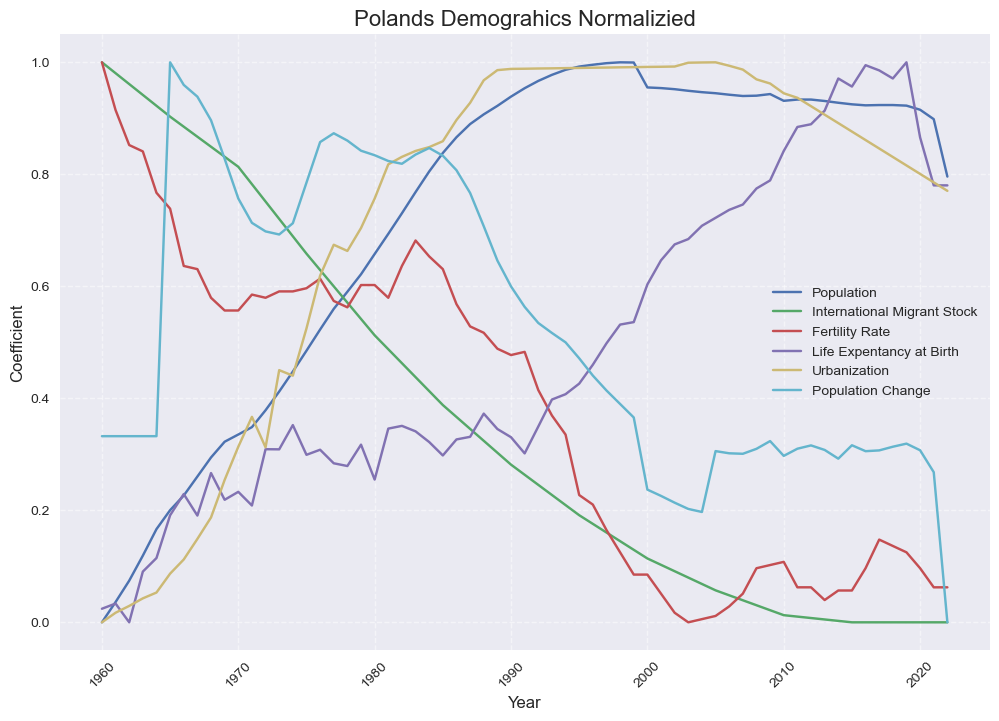

In [27]:
plt.style.use('seaborn-v0_8')
# Data scaling - othgerwise the data would be hard to read!
scaler= MinMaxScaler()
final_data_scaled = pd.DataFrame(scaler.fit_transform(final_data), columns=final_data.columns, index=final_data.index)
ax = final_data_scaled.plot(figsize=(12, 8), legend=True)

ax.set_title('Polands Demograhics Normalizied', fontsize=16)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Coefficient', fontsize=12)

ax.tick_params(axis='x', labelrotation=45)
ax.tick_params(axis='both', labelsize=10)

ax.grid(True, linestyle='--', alpha=0.5)

plt.savefig('poliand_demographics_statistics.png')

# Data anomaly 
It does not take an eagle sight to notice a slight data anomaly towards 2019 - it is likely to be caused by COVID-19 pandemic.<br>
For scientific purposes lets drop the data from 2019 onwards.

In [17]:
if(len(final_data)==63):
    final_data = final_data.drop(final_data.index[-3:])
final_data

,Population,International Migrant Stock,Fertility Rate,Life Expentancy at Birth,Urbanization
Year,,,,,
1960,29637450.0,2424881.0,2.98,67.680488,47.668335
1961,29964000.0,2389838.4,2.83,67.778049,47.899164
1962,30308500.0,2354795.8,2.72,67.426829,48.063771
1963,30712000.0,2319753.2,2.70,68.375610,48.246360
1964,31139450.0,2284710.6,2.57,68.629268,48.386846
1965,31444950.0,2249668.0,2.52,69.429268,48.842799
1966,31681000.0,2217339.8,2.34,69.826829,49.184288
1967,31987155.0,2185011.6,2.33,69.424390,49.680442
1968,32294655.0,2152683.4,2.24,70.219512,50.198814


# Time to get to work!
With data now ready, its time to test diffrent models, and see how they are doing

Model: Linear Regression
Prediction: [38001934.10147884 37933379.58822785 37681044.66220017 37577308.41046077
 37486213.13006231 37367786.61990359 37071174.62523562 37044659.67419042
 36765683.30353226 36627408.77923869 36611055.09521415 36449058.696923  ]
Len: 12
Mean Squared Error: 867651858764.7266
R-squared: -243.95327961197685



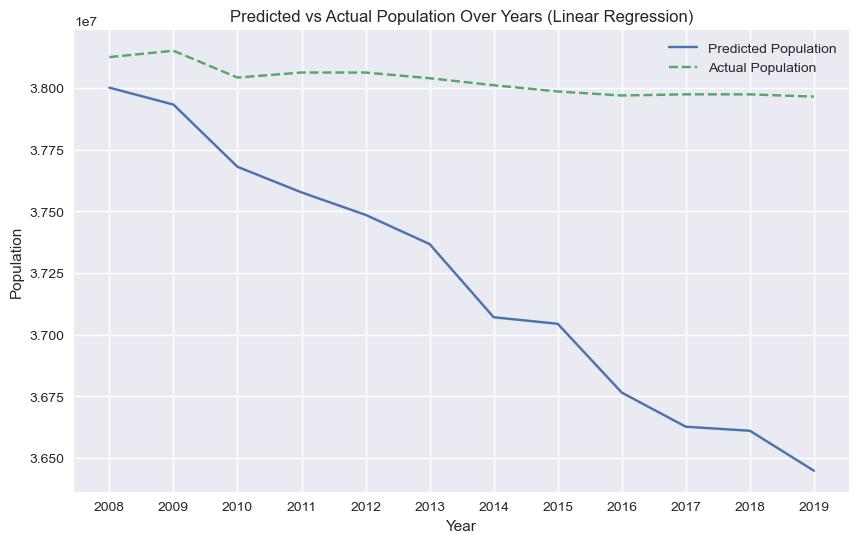

Model: Ridge Regression
Prediction: [38241568.11168621 38205167.02815166 38026068.10827377 37920611.17296195
 37845151.19100237 37736067.84548417 37521930.750562   37493215.78304487
 37300665.75714969 37216982.83315678 37183896.57068155 37045231.61564662]
Len: 12
Mean Squared Error: 262902516814.26962
R-squared: -73.22197401107705



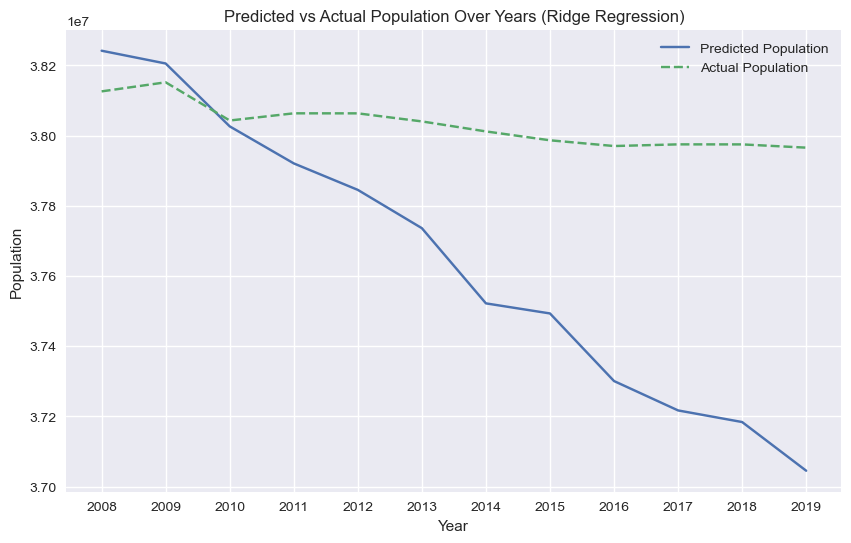

Model: Lasso Regression
Prediction: [38001968.87137273 37933418.96472138 37681094.76824829 37577358.51466569
 37486265.42387789 37367840.33663987 37071240.49829331 37044725.03962765
 36765761.27767891 36627494.45625751 36611138.20094341 36449145.28876266]
Len: 12
Mean Squared Error: 867535334006.7672
R-squared: -243.9203826368482



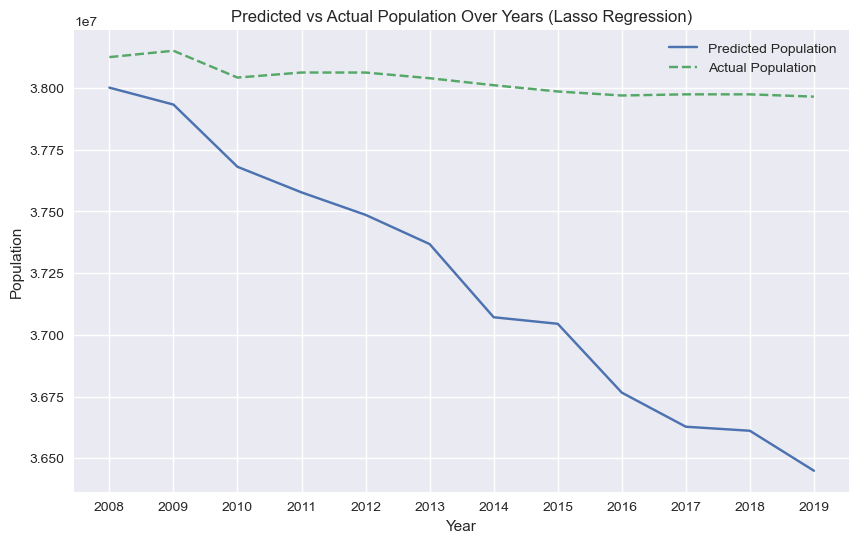

Model: Decision Tree Regression
Prediction: [37961529. 37961529. 37961529. 37961529. 37961529. 37456119. 37456119.
 37456119. 37456119. 36904134. 36904134. 35898587.]
Len: 12
Mean Squared Error: 654186358835.3334
R-squared: -183.68823924641032



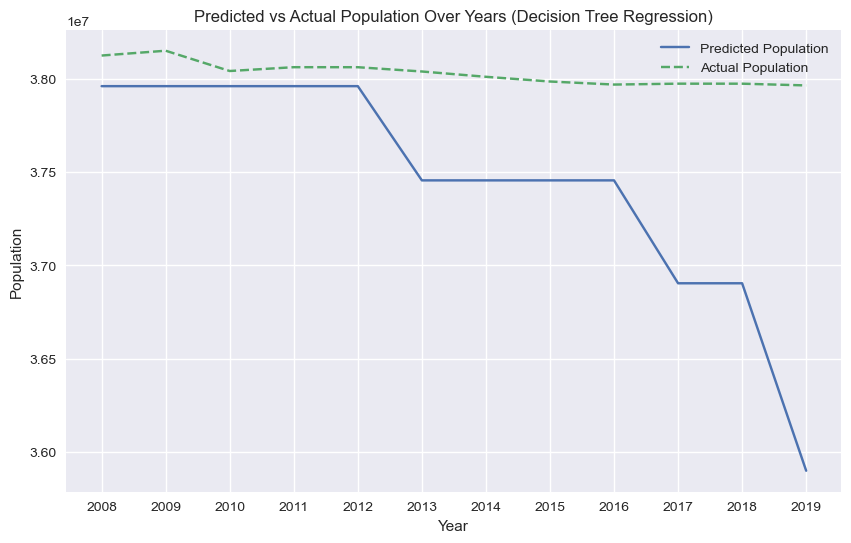

Model: Random Forest Regression
Prediction: [38114434.85 38114434.85 38086907.54 38043207.25 38019334.21 37986476.52
 37966747.49 37949714.56 37768733.02 37561148.04 37371444.22 37344695.4 ]
Len: 12
Mean Squared Error: 81087757619.13995
R-squared: -21.892490766363228



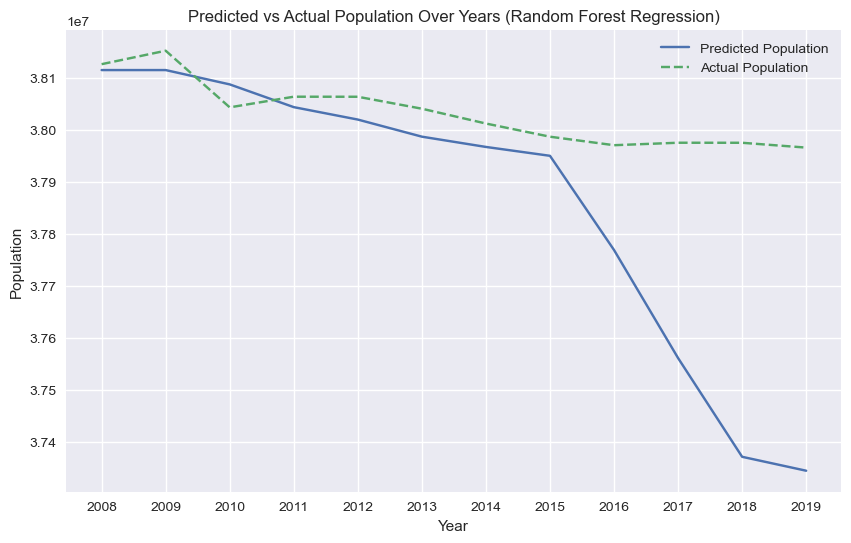

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
X=final_data.drop(columns='Population')
y=final_data['Population']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree Regression": DecisionTreeRegressor(),
    "Random Forest Regression": RandomForestRegressor()
}
for name, model in models.items():
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Model: {name}")
    print(f"Prediction: {y_pred}")
    print(f"Len: {len(y_pred)}")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")
    print("")
    df_pred = X_test.copy()
    df_pred['Predicted Population'] = y_pred
    df_pred['Actual Population'] = y_test
    
    df_pred = df_pred.sort_values('Year')
    plt.figure(figsize=(10, 6))
    plt.plot(df_pred.index, df_pred['Predicted Population'], label='Predicted Population')
    plt.plot(df_pred.index, y[-12:], label='Actual Population', linestyle='dashed')
    plt.xlabel('Year')
    plt.ylabel('Population')
    plt.title(f'Predicted vs Actual Population Over Years ({name})')
    plt.legend()
    plt.show()


## Results are rather unsuprising.